# **Machine Learning Housing Corporation Report**
___
**Task**: Given the [California Housing Prices Dataset](https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz), needed to create a model which would give the predictions of the median housing prices in the districts.

Current report is made relying on the [working notebook](https://github.com/kirillovmr/ml-housing-corp/blob/master/Housing.ipynb).

This project can be found in Aurélien Geron's book ***Hands-On Machine Learning with Scikit-Learn and TensorFlow*** Chapter 2.
___

# Getting the Dataset
___
The first necessary step was to retrieve the dataset automatically (given the fact that it could be updated frequently.)

In [56]:
%matplotlib inline

import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join('datasets', 'housing')
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
fetch_data()

Simply by calling ***fetch_data( )*** we can retrieve and extract the dataset into current working directory.
___
Now we can easily load the dataset and check it out:

In [57]:
import pandas as pd
import numpy as np

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()
housing[:3]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [58]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


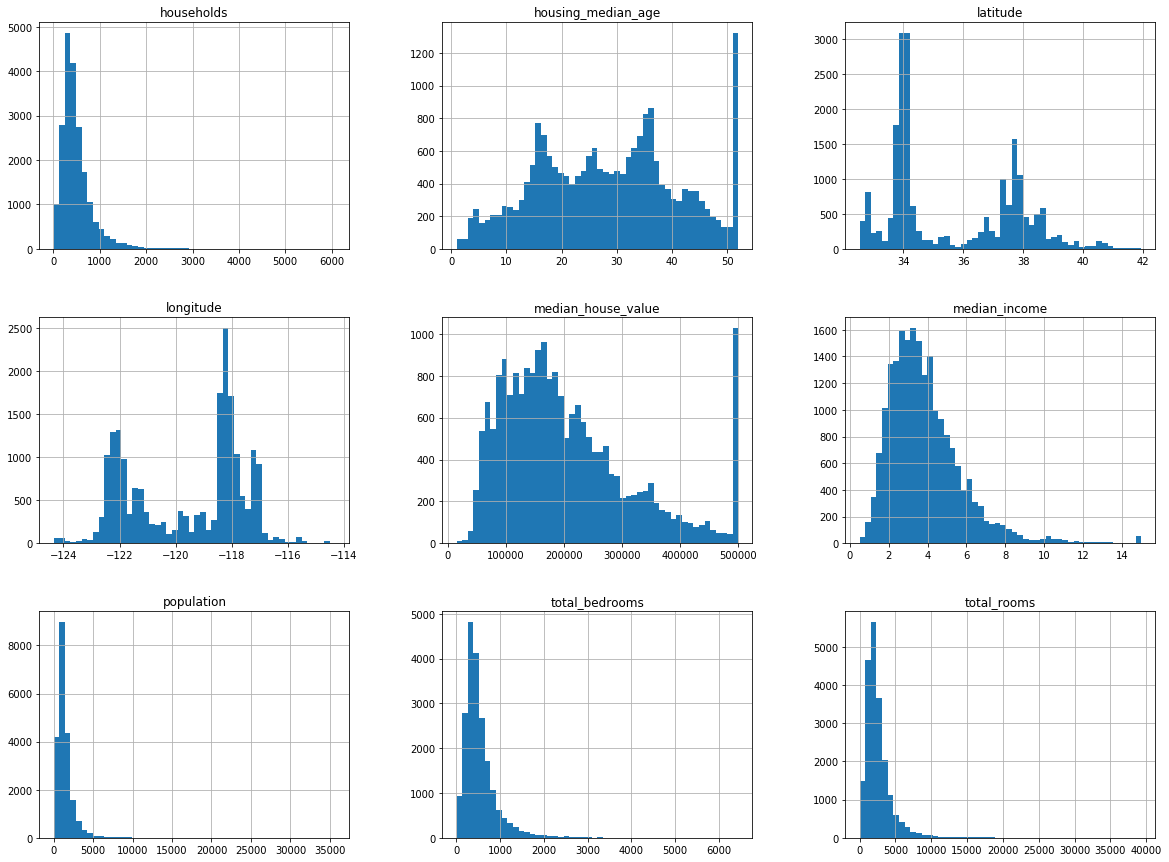

In [59]:
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20,15))
plt.show()

# Split the data
___
Here comes the step of splitting our data in a training and validating set. The key part here is to use ONLY the training set for exploring and training purposes in order to avoid underfitting or overfitting the model.

In [60]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
train_set[:3]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN


# Explore the data
___
Now we can start exporing the data to understand what are we dealing with. Here is a map of districts along the California. Tweaking the plotting function we can visualize it better. The bubble radius represents the district population while the bubbles with red color showing more expensive districts.

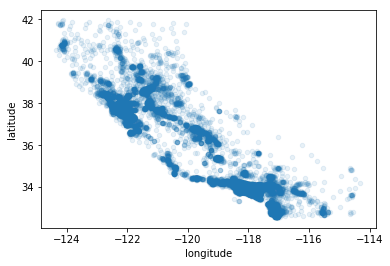

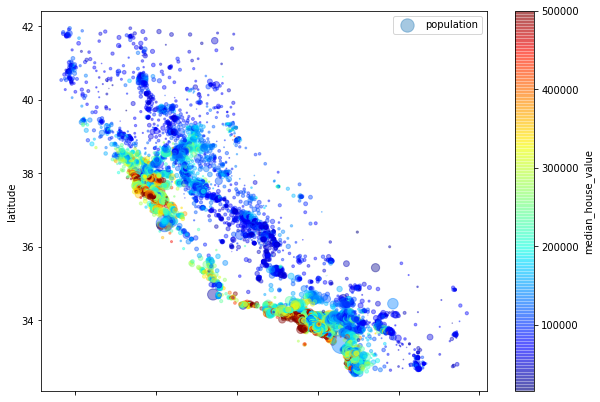

In [61]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, 
            s=housing['population']/100, label="population", figsize=(10,7),
            c="median_house_value", cmap=plt.get_cmap('jet'), colorbar=True)

___
Having a small exploration of the graphs we found a strong correlation between *median_income* and *median_house_value* features.

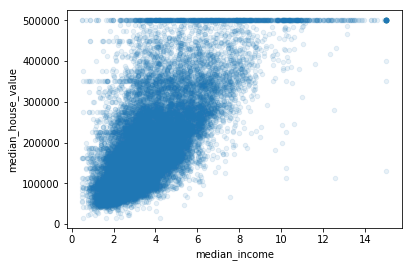

In [62]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

# Preparing the data
___
In ***housing*** we will keep all the data except *median_house_value*, which would be our velues for supervised learning.

In [63]:
housing = train_set.drop("median_house_value", axis=1)
housing_labels = train_set["median_house_value"].copy()

housing[:3]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,NEAR OCEAN


___
# Pipelines
### To deal with missing walues and prepare the data
___
Since median can be computed only on numeric values - create a copy of data withoud ***ocean_proximity***.

In [64]:
housing_num = housing.drop('ocean_proximity', axis=1)

Since ML models perform better on numeric data, we need to convert ***ocean_proximity*** feature to have numerical values.
One way we can do it is to use OrdinalEncoder and just encode data with approproate numbers (1,2,3 etc.)
But the drawback is that ML algoritm will think that neighbors are similar. 
___
So we need to use One Hot Encoding, it will create a matrix of 0 and 1, furthermore, it would store only positions of "1", so that its memory efficient:

In [65]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

Now we can create a Pipeline for numerical and categorical values together

In [66]:
from sklearn.compose import ColumnTransformer

num_attrib = list(housing_num)
cat_attrib = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attrib),
    ('cat', OneHotEncoder(), cat_attrib)
])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared[:2]

array([[ 1.27258656, -1.3728112 ,  0.34849025,  0.22256942,  0.21122752,
         0.76827628,  0.32290591, -0.326196  ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ],
       [ 0.70916212, -0.87669601,  1.61811813,  0.34029326,  0.59309419,
        -0.09890135,  0.6720272 , -0.03584338,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ]])

___
# Selecting and train a model
___
After testing different models such as *LinearRegression*, *DecisionTreeRegressor*, *RandomForestRegressor*, *SVR* and measuring their error we found that ***RandomForestRegressor*** is the most efficient.

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standatd deviation:", scores.std())
    
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
print("RMSE:", forest_rmse)

scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE: 21875.09664223342
Scores: [50389.70894023 52673.5987277  50652.98614259 52567.56228734
 53863.86592637 48937.04008048 48645.17811544 52294.51195728
 52058.43284099 53232.43631697]
Mean: 51531.53213353803
Standatd deviation: 1694.3531187034648


___
### Tuning the model
Here we've experimented with a couple of methods: ***GridSearchCV*** and ***RandomizedSearchCV***, finally we found the best params:

In [69]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [10,30,40], 'max_features': [4,6,8]}
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, 
                           scoring="neg_mean_squared_error", return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)
grid_search.best_params_

{'max_features': 6, 'n_estimators': 40}

___
# Testing the model on a Test set
___
Since we know the best params for our model, we can use them to evaluate the model on a test set:

In [70]:
final_model = grid_search.best_estimator_

X_test = test_set.drop("median_house_value", axis=1)
y_test = test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

49159.60674598636

Finally we've got a Root Mean Squared Error. Here is the best performance of our model with the current settings and preparations.
___
Now we can save a model to use it later:

In [71]:
from sklearn.externals import joblib

joblib.dump(forest_reg, "random_forest_regressor.pkl")
loaded_model = joblib.load("random_forest_regressor.pkl")